In [1]:
import geopandas as gpd

/Users/diegocaro/Projects/new-censation/.venv/lib/python3.12/site-packages/pyogrio/geopandas.py:382: UserWarning: More than one layer found in 'SIET-Chile_04Dic2025_Publicacion.gdb': 'SIET_CULTURAL' (default), 'SIET_ECONOMICA', 'SIET_AMBIENTAL', 'SIET_SOCIAL'. Specify layer parameter to avoid this warning.
  result = read_func(
/Users/diegocaro/Projects/new-censation/.venv/lib/python3.12/site-packages/pyogrio/raw.py:200: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts.  The processing may be really slow.  You can skip the processing by setting METHOD=SKIP.
  return ogr_read(


<Axes: >

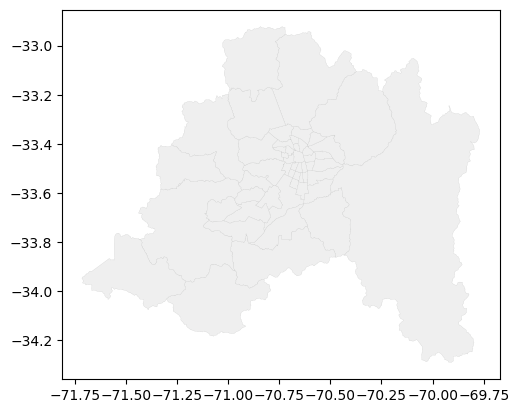

In [2]:
carto = gpd.read_file(
    "../data/raw/GDB_SIET-Chile_04Dic2025/SIET-Chile_04Dic2025_Publicacion.gdb"
)
carto[carto["COD_REG"] == "13"].plot(
    edgecolor="#abacab", facecolor="#efefef", linewidth=0.1
)

In [3]:
carto["COD_COM"] = carto["COD_COM"].astype(int)
carto["COD_PROV"] = carto["COD_PROV"].astype(int)
carto["COD_REG"] = carto["COD_REG"].astype(int)

In [4]:
carto.head()

,CUT,COD_REG,REGION,COD_PROV,PROVINCIA,COD_COM,COMUNA,MEDICION,ORDEN_MED,CLT_04,SHAPE_Length,SHAPE_Area,geometry
0,1101.0,1,01 TARAPACÁ,11,IQUIQUE,1101,IQUIQUE,Línea base,1.0,0.08,3.789837,0.198749,"MULTIPOLYGON (((-70.13266 -20.06332, -70.09894..."
1,1107.0,1,01 TARAPACÁ,11,IQUIQUE,1107,ALTO HOSPICIO,Línea base,1.0,0.07,0.952522,0.049622,"MULTIPOLYGON (((-69.91377 -20.22901, -69.94461..."
2,1401.0,1,01 TARAPACÁ,14,DEL TAMARUGAL,1401,POZO ALMONTE,Línea base,1.0,0.39,6.688255,1.195252,"MULTIPOLYGON (((-68.99311 -19.91994, -68.98631..."
3,1402.0,1,01 TARAPACÁ,14,DEL TAMARUGAL,1402,CAMIÑA,Línea base,1.0,1.45,2.114811,0.189286,"MULTIPOLYGON (((-69.39485 -19.06219, -69.38991..."
4,1403.0,1,01 TARAPACÁ,14,DEL TAMARUGAL,1403,COLCHANE,Línea base,1.0,0.63,3.091394,0.344852,"MULTIPOLYGON (((-68.95021 -18.93674, -68.92 -1..."


In [5]:
carto[carto["COD_REG"] == "13"]

,CUT,COD_REG,REGION,COD_PROV,PROVINCIA,COD_COM,COMUNA,MEDICION,ORDEN_MED,CLT_04,SHAPE_Length,SHAPE_Area,geometry


<Axes: >

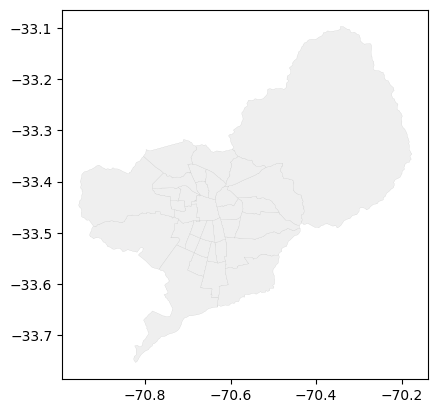

In [6]:
gran_santiago = carto[
    (carto["PROVINCIA"] == "SANTIAGO")
    | (carto["COMUNA"].isin(["SAN BERNARDO", "PUENTE ALTO"]))
]
gran_santiago.plot(edgecolor="#abacab", facecolor="#efefef", linewidth=0.1)

In [7]:
gran_santiago.to_file("../data/processed/gran_santiago.geojson", driver="GeoJSON")

In [8]:
rm = carto[carto["COD_REG"] == 13]

assert len(rm) > 0

rm.to_file("../data/processed/region_metropolitana.geojson", driver="GeoJSON")

In [9]:
biobio = carto[carto["COD_REG"] == 8]
biobio.to_file("../data/processed/region_biobio.geojson", driver="GeoJSON")

<Axes: >

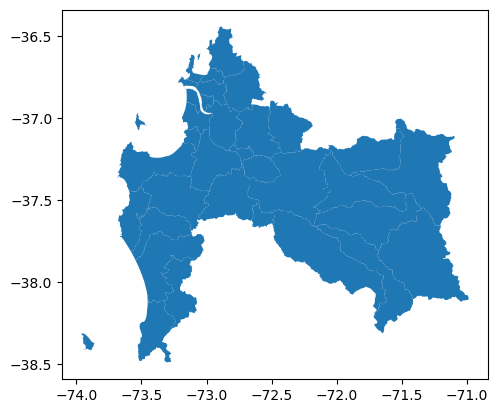

In [10]:
biobio.plot()

In [11]:
carto.to_file("../data/processed/chile_comunas.geojson", driver="GeoJSON")

<Axes: >

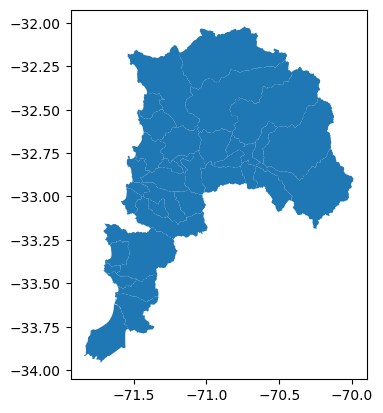

In [30]:
ignore = ["ISLA DE PASCUA", "JUAN FERNÁNDEZ"]
# valparaiso = carto[(carto["COD_REG"] == 5) & ~(carto.COMUNA.isin(ignore))]
valparaiso = carto[(carto["COD_REG"] == 5) & (carto.geometry.bounds.minx > -72)]
valparaiso.plot()

In [31]:
valparaiso

,CUT,COD_REG,REGION,COD_PROV,PROVINCIA,COD_COM,COMUNA,MEDICION,ORDEN_MED,CLT_04,SHAPE_Length,SHAPE_Area,geometry
41,5102.0,5,05 VALPARAÍSO,51,VALPARAÍSO,5102,CASABLANCA,Línea base,1.0,0.34,2.027713,0.092398,"MULTIPOLYGON (((-71.69299 -33.15701, -71.68721..."
42,5103.0,5,05 VALPARAÍSO,51,VALPARAÍSO,5103,CONCÓN,Línea base,1.0,0.06,0.483874,0.007395,"MULTIPOLYGON (((-71.49907 -32.91502, -71.49703..."
44,5105.0,5,05 VALPARAÍSO,51,VALPARAÍSO,5105,PUCHUNCAVÍ,Línea base,1.0,0.20,1.025243,0.028912,"MULTIPOLYGON (((-71.41385 -32.63011, -71.41383..."
45,5107.0,5,05 VALPARAÍSO,51,VALPARAÍSO,5107,QUINTERO,Línea base,1.0,0.38,0.757756,0.014075,"MULTIPOLYGON (((-71.53089 -32.76853, -71.52991..."
46,5109.0,5,05 VALPARAÍSO,51,VALPARAÍSO,5109,VIÑA DEL MAR,Línea base,1.0,0.04,0.599399,0.011646,"MULTIPOLYGON (((-71.54641 -32.94484, -71.54508..."
48,5301.0,5,05 VALPARAÍSO,53,LOS ANDES,5301,LOS ANDES,Línea base,1.0,0.04,2.252347,0.118967,"MULTIPOLYGON (((-70.14747 -32.72664, -70.14722..."
49,5302.0,5,05 VALPARAÍSO,53,LOS ANDES,5302,CALLE LARGA,Línea base,1.0,0.12,0.978112,0.031072,"MULTIPOLYGON (((-70.64707 -32.82879, -70.64674..."
50,5303.0,5,05 VALPARAÍSO,53,LOS ANDES,5303,RINCONADA,Línea base,1.0,NaN,0.562829,0.011865,"MULTIPOLYGON (((-70.71062 -32.80042, -70.71258..."
51,5304.0,5,05 VALPARAÍSO,53,LOS ANDES,5304,SAN ESTEBAN,Línea base,1.0,NaN,1.811538,0.132203,"MULTIPOLYGON (((-70.21831 -32.42918, -70.2145 ..."
52,5401.0,5,05 VALPARAÍSO,54,PETORCA,5401,LA LIGUA,Línea base,1.0,0.21,2.102745,0.111543,"MULTIPOLYGON (((-71.22268 -32.1275, -71.21786 ..."


In [32]:
valparaiso.to_file("../data/processed/region_valparaiso.geojson", driver="GeoJSON")